In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
import theano
import theano.tensor as T
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [9]:
def plot_decision_boundary(pred_func):
    x_min, x_max = train_x[:, 0].min() - .5, train_x[:, 0].max() + .5
    y_min, y_max = train_x[:, 1].min() - .5, train_x[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xx = xx.astype(np.float32)
    yy = yy.astype(np.float32)
    X.set_value(np.c_[xx.ravel(), yy.ravel()].astype(np.float32))
    Z = pred_func()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.Spectral)

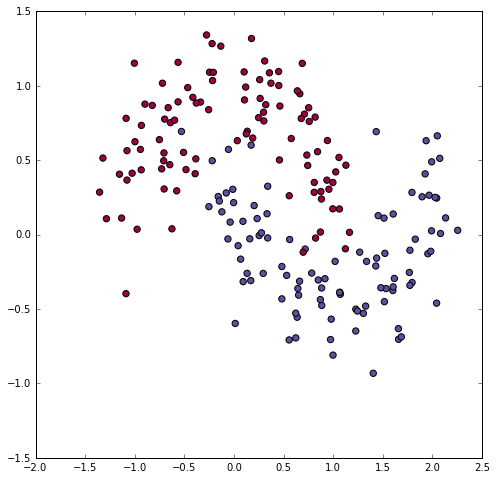

In [199]:
np.random.seed(0)
train_x, train_y = sklearn.datasets.make_moons(200, noise=0.20)
train_x = train_x.astype(np.float32)
train_y = train_y.astype(np.int32)
train_y_onehot = np.eye(2)[train_y]
plt.scatter(train_x[:,0], train_x[:,1], s=40, c=train_y, cmap=plt.cm.Spectral)

In [214]:
N = train_x.shape[0]
num_inputs, num_outputs, num_hidden = train_x.shape[1], 2, 100
learning_rate = np.float32(0.01)
lambda_reg = np.float32(0.01)

X = theano.shared(train_x.astype(np.float32))
y = theano.shared(train_y_onehot.astype(np.float32))
W1 = theano.shared(np.random.randn(num_inputs, num_hidden).astype(np.float32) , name='W1')
b1 = theano.shared(np.random.randn(num_hidden).astype(np.float32), name='b1')
W2 = theano.shared(np.random.randn(num_hidden, num_outputs).astype(np.float32) , name='W2')
b2 = theano.shared(np.random.randn(num_outputs).astype(np.float32), name='b2')

z1 = X.dot(W1) + b1
a1 = T.tanh(z1)
z2 = a1.dot(W2) + b2
y_hat = T.nnet.softmax(z2)
loss_reg = 0.5 * lambda_reg * (T.sum(T.sqr(W1)) + T.sum(T.sqr(W2)))
loss = T.nnet.categorical_crossentropy(y_hat, y).sum()+ loss_reg
prediction = T.argmax(y_hat, axis=1)

In [215]:
dW1 = T.grad(loss, W1)
db1 = T.grad(loss, b1)
dW2 = T.grad(loss, W2)
db2 = T.grad(loss, b2)

forward = theano.function([], y_hat)
calculate_loss = theano.function([], loss)
predict = theano.function([], prediction)


update = theano.function([], 
    updates=((W1, W1 - learning_rate * dW1),
             (W2, W2 - learning_rate * dW2),
             (b1, b1 - learning_rate * db1),
             (b2, b2 - learning_rate * db2)))

In [ ]:
np.random.seed(0)
W1.set_value((np.random.randn(num_inputs, num_hidden) / np.sqrt(num_inputs)).astype(np.float32))
b1.set_value(np.zeros(num_hidden).astype(np.float32))
W2.set_value((np.random.randn(num_hidden, num_outputs) / np.sqrt(num_hidden)).astype(np.float32))
b2.set_value(np.zeros(num_outputs).astype(np.float32))

for it in range(20000):
    update()
    if it % 1000 == 0:
        print 'it', it, 'loss', calculate_loss() / N


it 0 loss 3.33763902657
it 1000 loss 0.0559165071991
it 2000 loss 0.0515487316277
it 3000 loss 0.0490305471319
it 4000 loss 0.0449864555958
it 5000 loss 0.0414247128815
it 6000 loss 0.0395171948521
it 7000 loss 0.0382430696385
it 8000 loss 0.0373207159748
it 9000 loss 0.0366116066575
it 10000 loss 0.0360140306035
it 11000 loss 0.0354599699477
it 12000 loss 0.0349975459512
it 13000 loss 0.0345449369813
it 14000 loss 0.0340956104166
it 15000 loss 0.0336805705425
it 16000 loss 0.0333158960696
it 17000 loss 0.033002675426
it 18000 loss 0.0327336361297
it 19000 loss 0.0324995235818


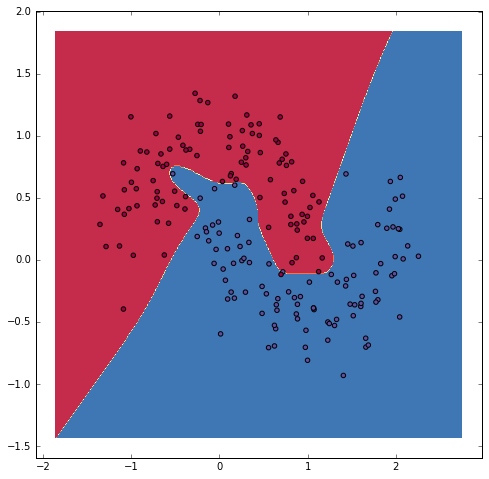

In [206]:
plot_decision_boundary(lambda : predict())